In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

sns.set_theme()  
%matplotlib inline

In [38]:
df = pd.read_csv('./Lezioni.csv')
df = df.drop('Unnamed: 0', axis=1)
df['Data'] = pd.to_datetime(df['Data'].astype(str), format='%Y-%m-%d')
df.head()

,Index,Data,Ora,Professoressa,Livello,Lezione,Giorno della settimana,Mese,Anno
0,1,2023-05-22,8,Virginia,B1,B132,Lunedì,Maggio,2023
1,2,2023-05-22,11,Graziana,B1,B135,Lunedì,Maggio,2023
2,3,2023-05-23,10,Francesca,C1,C123,Martedì,Maggio,2023
3,4,2023-05-23,11,Sara,B1,B143,Martedì,Maggio,2023
4,5,2023-05-24,10,Alice,B1,B141,Mercoledì,Maggio,2023


In [39]:
def guia(data_frame):
    linhas, qnt_colunas = data_frame.shape
    sequencia = list(range(qnt_colunas + 1))
    sequencia = sequencia[1:]

    colunas = data_frame.columns.to_list()
    lista_tipos = [str(type(data_frame[col][0])).split("'")[1] for col in data_frame.columns]
    lista_categorias = [data_frame[col].nunique() for col in data_frame.columns]

    elementos_nulos = data_frame.isnull().sum()
    elementos_nulos = elementos_nulos.to_list()

    percentual_dados_nulos = round((data_frame.isnull().sum() / linhas) * 100)
    percentual_dados_nulos = percentual_dados_nulos.to_list()

    dados = pd.DataFrame({'Nome': colunas, 
                          'Tipo': lista_tipos, 
                          'qnt_categorias': lista_categorias,
                          'Dados nulos' : elementos_nulos,
                          'Dados nulos %' : percentual_dados_nulos}, index=sequencia)
    
    # Cabeçalhos
    print('Tabela Exploratória')
    print(f'Nesses dados temos {linhas} linhas e {qnt_colunas} colunas.')
    
    return dados

guia_df = guia(df)
guia_df.head(10)

Tabela Exploratória
Nesses dados temos 206 linhas e 9 colunas.


,Nome,Tipo,qnt_categorias,Dados nulos,Dados nulos %
1,Index,numpy.int64,206,0,0.0
2,Data,pandas._libs.tslibs.timestamps.Timestamp,139,0,0.0
3,Ora,numpy.int64,8,0,0.0
4,Professoressa,str,43,0,0.0
5,Livello,str,3,0,0.0
6,Lezione,str,86,0,0.0
7,Giorno della settimana,str,7,0,0.0
8,Mese,str,10,0,0.0
9,Anno,numpy.int64,2,0,0.0


C:\Users\Soldado\AppData\Local\Temp\ipykernel_15588\1031386987.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)
C:\Users\Soldado\AppData\Local\Temp\ipykernel_15588\1031386987.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mese.sort_values(valore).groupby(valore).count().apply(media).plot(figsize=[15,5])


<Axes: xlabel='Mese'>

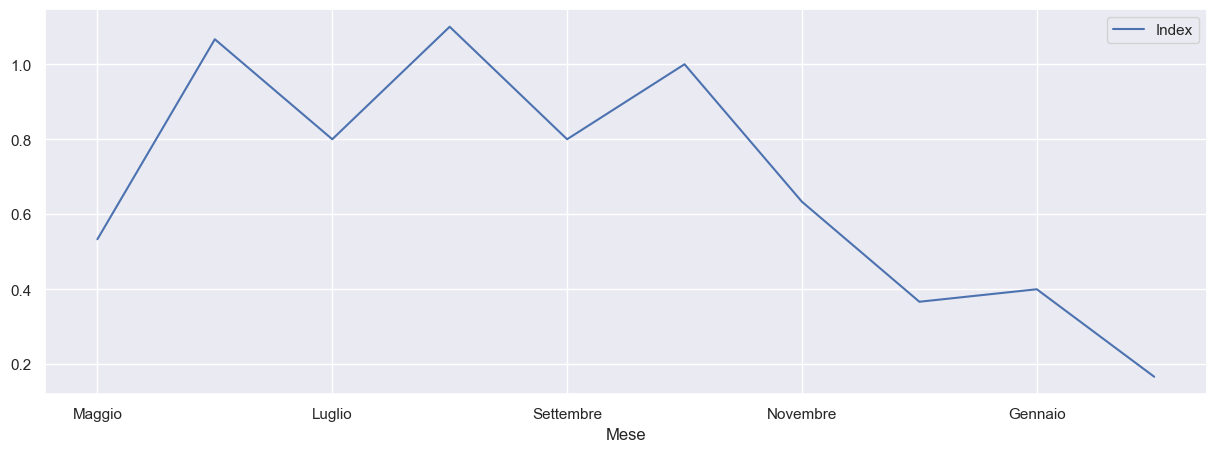

In [40]:
months_order = ['Maggio', 'Giugno', 'Luglio', 'Agosto', 'Settembre', 'Ottobre',
       'Novembre', 'Dicembre', 'Gennaio', 'Febbraio']

valore = 'Mese'
df_mese = df[['Index', valore]]

def media(giorno):
    giorno = (giorno / 30) #* 100
    return giorno

df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)
df_mese.sort_values(valore).groupby(valore).count().apply(media).plot(figsize=[15,5])

In [41]:
df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)
df_mese = df_mese.sort_values(valore).groupby(valore).count().apply(media)
percentuale = df_mese['Index'].mean()

print(f'\nAbbiamo circa {round((percentuale), 1)} lezioni al giorno\n')


Abbiamo circa 0.7 lezioni al giorno



C:\Users\Soldado\AppData\Local\Temp\ipykernel_15588\3441429450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mese[valore] = pd.Categorical(df_mese[valore], categories=months_order, ordered=True)
C:\Users\Soldado\AppData\Local\Temp\ipykernel_15588\3441429450.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_mese = df_mese.sort_values(valore).groupby(valore).count().apply(media)


In [42]:
dfby = df[['Index', 'Data']]

In [43]:
agosto = df[df['Mese'] == 'Agosto']
agosto.head()

,Index,Data,Ora,Professoressa,Livello,Lezione,Giorno della settimana,Mese,Anno
72,73,2023-08-01,10,Mirela,B2,B204,Martedì,Agosto,2023
73,74,2023-08-01,11,Chiara,B1,B111,Martedì,Agosto,2023
74,75,2023-08-03,7,Lorella,B2,B202,Giovedì,Agosto,2023
75,76,2023-08-03,10,Grazia,B1,B125,Giovedì,Agosto,2023
76,77,2023-08-04,7,Federica,C1,C129,Venerdì,Agosto,2023


In [45]:
anno_2024 = df[df['Anno'] == 2024]
anno_2024

,Index,Data,Ora,Professoressa,Livello,Lezione,Giorno della settimana,Mese,Anno
189,190,2024-01-02,7,Laura,C1,C108,Martedì,Gennaio,2024
190,191,2024-01-04,10,Beatrice,B2,B231,Giovedì,Gennaio,2024
191,192,2024-01-05,7,Clara,C1,C132,Venerdì,Gennaio,2024
192,193,2024-01-09,7,Rita,B1,B118,Martedì,Gennaio,2024
193,194,2024-01-10,10,Asia,C1,C119,Mercoledì,Gennaio,2024
194,195,2024-01-11,9,Federica,C1,C124,Giovedì,Gennaio,2024
195,196,2024-01-15,10,Silvia,B2,B202,Lunedì,Gennaio,2024
196,197,2024-01-16,13,Mariacristina,B1,B136,Martedì,Gennaio,2024
197,198,2024-01-17,17,Anna,C1,C107,Mercoledì,Gennaio,2024
198,199,2024-01-17,13,Mariacristina,C1,C122,Mercoledì,Gennaio,2024
